# Numerical Integration

$$I = \int_{a}^{b} f(x) \, dx \approx \sum_{i=0}^{n} A_i \, f(x_i)$$

## Trapezoidal Rule
<img src="trapezoidal.png" width=500px />
Assuming the range $x = a \text{ to } b$ is divided into $n$ equal intervals, there will be $n + 1$ equally spaced data points $x_0, x_1, \ldots , x_n$. For each $x_i$, there will be a corresponding $y_i$. Then, the approximation to the integral by **trapezoidal rule** is given as:
$$I \approx \frac{h}{2} \left[ y_0 + 2 \, \left( \sum_{i=1}^{n-1} y_i \right) + y_n \right]$$

## Simpson's 1/3 Rule
<img src="simpson.png" width=500px/>
Simpson's 1/3 rule requires that the number of equal intervals be an even number. That is, the number of data points must be an odd number. Then, the approximation to the integral by **Simpson's 1/3 rule** is given as:
$$I \approx \frac{h}{3} \left[ y_0 + 4 \, \left( \sum_{i=1, 3, 5}^{n-1} y_i \right) + 2 \, \left( \sum_{i=2, 4, 6}^{n-2} y_i \right) y_n \right]$$

Trapezoidal rule with 51 points: 0.999917751944
Simpson's 1/3 rule with 51 points: 1.00000000541
Trapezoidal rule with 101 points: 0.99997943824
Simpson's 1/3 rule with 101 points: 1.00000000034


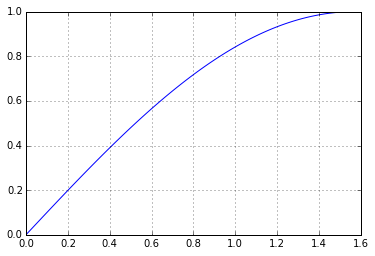

In [2]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def trapezoidal(y, h):
    s = (y[0] + y[-1] + 2* np.sum(y[1:-1])) * h / 2.0
    return s

def simpson(y, h):
    if y.size % 2 == 1:
        s = (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])) * h / 3.0
    else:
        s = (y[0] + y[-2] + 4 * np.sum(y[1:-2:2]) + 2 * np.sum(y[2:-3:2])) * h / 3.0
        s += (y[-2] + y[-1]) * h / 2.0
    return s

x = np.linspace(0, np.pi/2, 51)
y = np.sin(x)

h = x[1] - x[0]
s1 = trapezoidal(y, h)
print 'Trapezoidal rule with 51 points:', s1

s2 = simpson(y, h)
print "Simpson's 1/3 rule with 51 points:", s2

x = np.linspace(0, np.pi/2, 101)
y = np.sin(x)
h = x[1] - x[0]
s3 = trapezoidal(y, h)
print 'Trapezoidal rule with 101 points:', s3
s4 = simpson(y, h)
print "Simpson's 1/3 rule with 101 points:", s4

plt.plot(x, y)
plt.grid()
plt.show()

In [3]:
from sympy import *
init_printing()

xx, yy = symbols('x y')
yy = sin(xx)
yy
A = integrate(yy, (xx, 0, pi/2))
print A

1


## Stress Distribution in Concrete as per IS456:2000

As per IS 456:2000, it is assumed that the strain varies linearly across the depth of a cross section. IS 456:2000 also specifies the stress strain relationship for concrete and steel. We can use this information to determine the stress distribution across the depth of a concrete beam, find the stress resultant and its point of action using numerical integration.
$$
\begin{align*}
\frac{\epsilon_c}{x} & = \frac{\epsilon_{cu}}{x_u} \\
\epsilon_c & = \frac{\epsilon_{cu}}{x_u} \, x \\
f_c & = \begin{cases}
0.446 \, f_{ck} \left[ 2 \, \left( \frac{\epsilon_c}{\epsilon_{cy}} \right) - \left( \frac{\epsilon_c}{\epsilon_{cy}} \right)^2 \right] & 0 \leq \epsilon_c \leq \epsilon_{cy} \\
0.446 \, f_{ck} & \epsilon_{cy} < \epsilon_{c} \leq \epsilon_{cu}
\end{cases} \\
C & = b \, \int_{0}^{x_u} f_c \, dx \\
  & = b \, \int_{0}^{x_u} f_c \, dx \\
  M & = \int_{0}^{x_u} f_c \, b \, x \, dx \\
    & = b \, \int_{0}^{x_u} f_c \, x \, dx \\
    \bar{x} & = \frac{M}{C}
\end{align*}
$$

At collapse, strain in concrete is $\epsilon_{cu} = 0.0035$. If we know the depth of neutral axis, we can determine the strain and stress at different locations across the depth. Magnitude of the stress resultant is given by the area of the stress distribution, which is obtained by integrating stress across the depth. Moment of the stress resultant about the neutral axis is obtained by integrating 

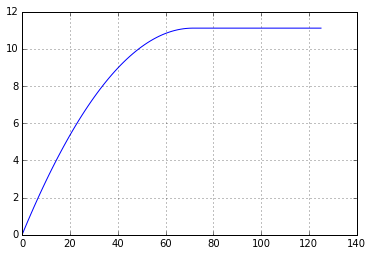

1124.33877315 1124.33862434


In [17]:
def conc_stress(ec, fck, ecy=0.002):
    if ec < ecy:
        ee = ec / ecy
        fc = 2 * ee - ee**2
    else:
        fc = 1.0
    return 4.0 / 9.0 * fck * fc

ecu = 0.0035
xu = 125.0
fck = 25.0
xx = np.linspace(0, xu, 101)
x = xx * ecu / xu
y = np.array([conc_stress(e, fck) for e in x])

plt.plot(xx, y)
plt.grid()
plt.show()

h = xx[1] - xx[0]
C = simpson(y, h)
print C, 68/189*fck*xu

In [19]:
yy = y * xx
M = simpson(yy, h)
xbar = M/C
print xu - xbar, 99/238*xu, (0.416*xu - (xu - xbar)) / (99/238*xu) * 100

51.9957981734 51.9957983193 0.00808108882941


The actual area of stress diagram is given by
$$A = \frac{68}{189} \, f_{ck} \, b \, x_u$$
Assuming $f_{ck}=25, b=1 \text{ and } x_u = 125$, we get $A = \frac{68}{189} \times 25 \times 1 \times 125 = 1124.3386$. 

## Improvements
Accuracy of the integral depends on the step size (that is, number of intervals). More the number of intervals, more accurate is the integral. Theoretically, a numerical method can never give the accurate answer. Trapezoidal rule is simple but not as accurate as Simpson's rule for the same number of data points.

There is a recursive form of trapezoidal rule where we can begin with only one interval and successively keep on doubling the number of intervals. Each time we double the number of intervals, the value of the integral will improve. We can keep checking the change in the integral in subsequent iterations and stop when the change is too small.

## References
1. Chapra, S.C., _Applied Numerical Methods with MATLAB for Engineers and Scientists_, 3ed., McGraw Hill, 2008.
2. Kiusalaas, J., _Numerical Methods in Engineering with Python_, Cambridge University Press, 2005.